# Pandas Fundamentals

## Pandas Series Object

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%matplotlib inline

In [3]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]

In [4]:
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [5]:
type(masses)

pandas.core.series.Series

<AxesSubplot: >

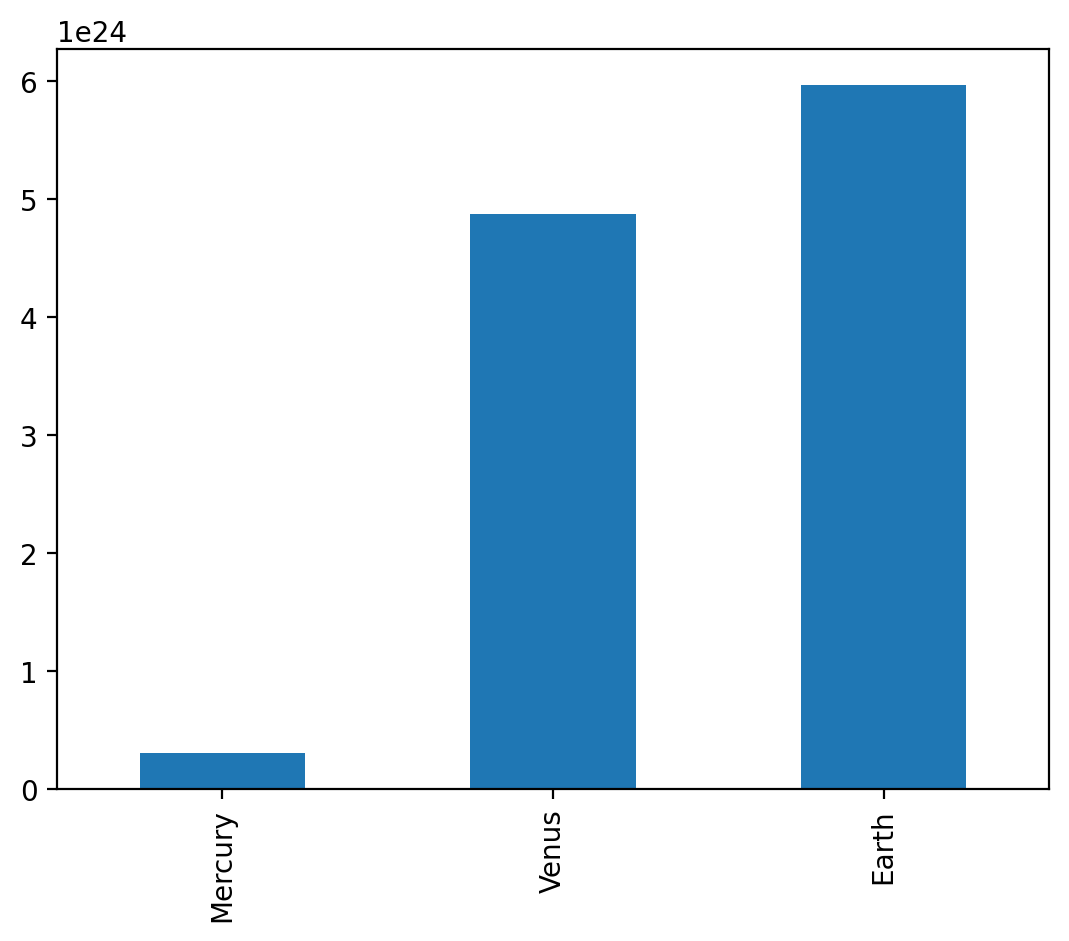

In [6]:
masses.plot(kind='bar')

In [7]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

In [8]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

In [9]:
masses.loc['Earth']

5.97e+24

In [10]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

In [11]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [12]:
masses.iloc[:2]

Mercury    3.000000e+23
Venus      4.870000e+24
dtype: float64

In [13]:
masses.values

array([3.00e+23, 4.87e+24, 5.97e+24])

In [14]:
type(masses.values)

numpy.ndarray

In [15]:
type(masses.index)

pandas.core.indexes.base.Index

## Dataframes

In [16]:
data = {'mass': [0.3e24, 4.87e24, 5.97e24],
        'diameter': [4879e3, 12_104e3, 12_756e3],
        'rotation_period': [1407.6, np.nan, 23.9]
       }

In [17]:
data

{'mass': [3e+23, 4.87e+24, 5.97e+24],
 'diameter': [4879000.0, 12104000.0, 12756000.0],
 'rotation_period': [1407.6, nan, 23.9]}

In [18]:
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])

In [19]:
df

,mass,diameter,rotation_period
Mercury,3.000000e+23,4879000.0,1407.6
Venus,4.870000e+24,12104000.0,NaN
Earth,5.970000e+24,12756000.0,23.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Mercury to Earth
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mass             3 non-null      float64
 1   diameter         3 non-null      float64
 2   rotation_period  2 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


In [21]:
df.min()

mass               3.000000e+23
diameter           4.879000e+06
rotation_period    2.390000e+01
dtype: float64

In [22]:
df.std()

mass               3.006765e+24
diameter           4.371744e+06
rotation_period    9.784237e+02
dtype: float64

In [23]:
df.describe()

,mass,diameter,rotation_period
count,3.000000e+00,3.000000e+00,2.000000
mean,3.713333e+24,9.913000e+06,715.750000
std,3.006765e+24,4.371744e+06,978.423653
min,3.000000e+23,4.879000e+06,23.900000
25%,2.585000e+24,8.491500e+06,369.825000
50%,4.870000e+24,1.210400e+07,715.750000
75%,5.420000e+24,1.243000e+07,1061.675000
max,5.970000e+24,1.275600e+07,1407.600000


In [24]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

In [25]:
df.mass

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

In [26]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [27]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [28]:
df.loc['Earth', 'mass']

5.97e+24

In [29]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

In [30]:
volume = 4/3 * np.pi * (df.diameter/2)**3

In [31]:
volume

Mercury    6.081225e+19
Venus      9.285074e+20
Earth      1.086781e+21
Name: diameter, dtype: float64

In [32]:
df.mass/volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

In [33]:
df['density'] = df.mass/volume

In [34]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


## Merging Data

In [35]:
temperature = pd.Series([167, 464, 15, -65],
                        index=['Mercury', 'Venus', 'Earth', 'Mars'],
                        name='temperature')
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [36]:
df.join(temperature)

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15


In [37]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [38]:
df.join(temperature, how='right')

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [39]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [40]:
new_df = df.join(temperature, how='right')

In [71]:
new_df

,mass,diameter,rotation_period,density,temperature
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,167
Venus,4.870000e+24,12104000.0,NaN,5244.977070,464
Earth,5.970000e+24,12756000.0,23.9,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


## Reordering Columns and Reindexing

In [42]:
newer_df = new_df[['diameter', 'rotation_period', 'mass', 'density', 'temperature']]

In [72]:
new_df = new_df[['diameter', 'rotation_period', 'mass', 'density', 'temperature']]

In [73]:
new_df

,diameter,rotation_period,mass,density,temperature
Mercury,4879000.0,1407.6,3.000000e+23,4933.216530,167
Venus,12104000.0,NaN,4.870000e+24,5244.977070,464
Earth,12756000.0,23.9,5.970000e+24,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [43]:
newer_df

,diameter,rotation_period,mass,density,temperature
Mercury,4879000.0,1407.6,3.000000e+23,4933.216530,167
Venus,12104000.0,NaN,4.870000e+24,5244.977070,464
Earth,12756000.0,23.9,5.970000e+24,5493.285577,15
Mars,NaN,NaN,NaN,NaN,-65


In [44]:
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])

In [45]:
everyone

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577
Mars,NaN,NaN,NaN,NaN


## Boolean Operations and Changing Values

In [46]:
df.mass > 4e24

Mercury    False
Venus       True
Earth       True
Name: mass, dtype: bool

In [47]:
df[df.mass > 4e24]

,mass,diameter,rotation_period,density
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [48]:
df

,mass,diameter,rotation_period,density
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530
Venus,4.870000e+24,12104000.0,NaN,5244.977070
Earth,5.970000e+24,12756000.0,23.9,5493.285577


In [49]:
df['is_big'] = df.mass > 4e24

In [50]:
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,True
Earth,5.970000e+24,12756000.0,23.9,5493.285577,True


In [51]:
df.loc['Earth', 'mass'] = 5.98e24

In [52]:
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104000.0,NaN,5244.977070,True
Earth,5.980000e+24,12756000.0,23.9,5493.285577,True


In [53]:
df.loc['Venus', 'diameter'] += 1

In [54]:
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104001.0,NaN,5244.977070,True
Earth,5.980000e+24,12756000.0,23.9,5493.285577,True


## Plotting

<AxesSubplot: xlabel='mass', ylabel='diameter'>

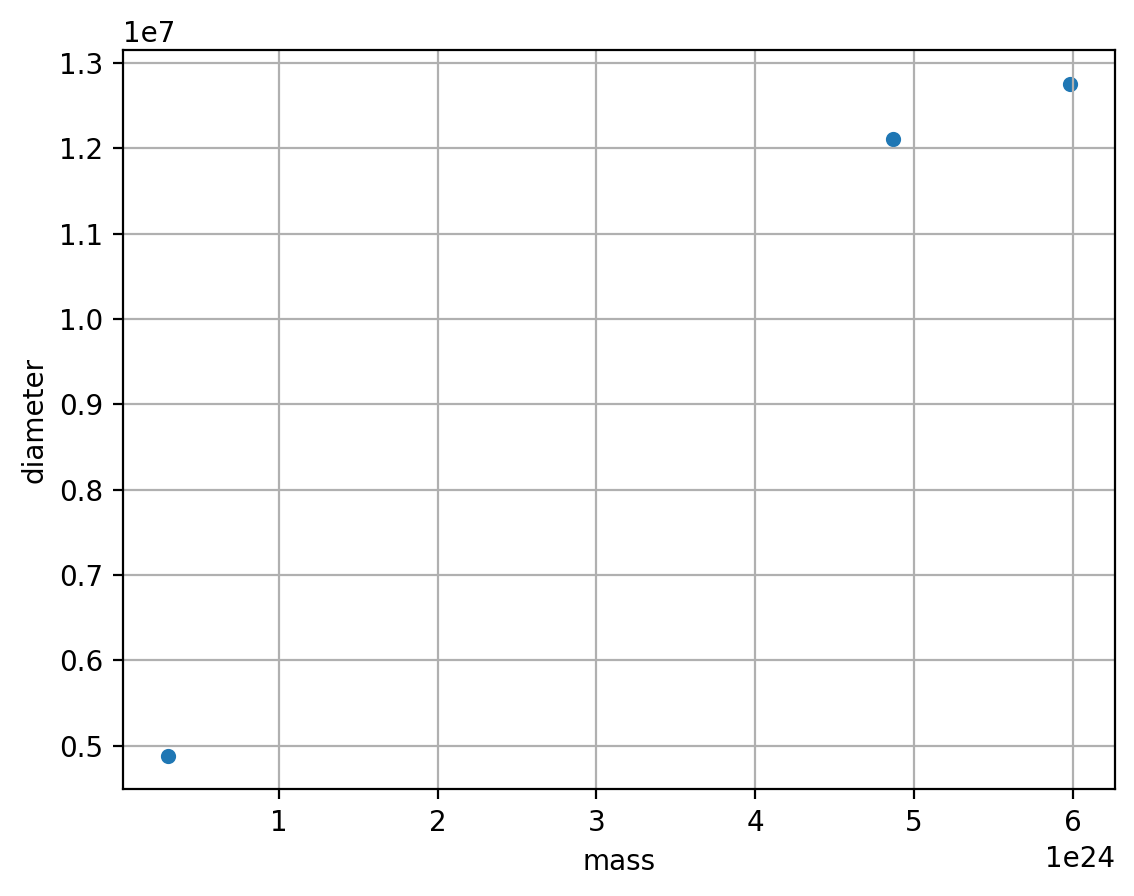

In [55]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<AxesSubplot: >

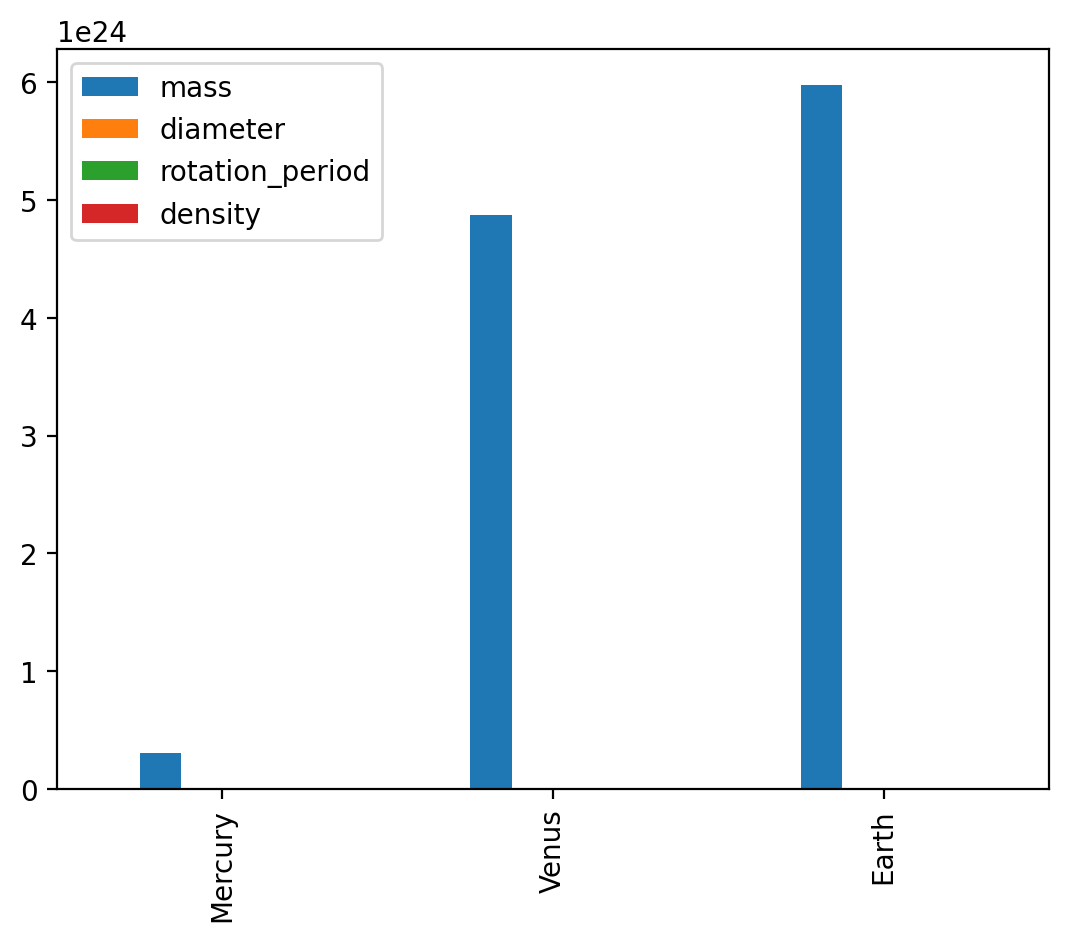

In [56]:
df.plot(kind='bar')

In [57]:
df

,mass,diameter,rotation_period,density,is_big
Mercury,3.000000e+23,4879000.0,1407.6,4933.216530,False
Venus,4.870000e+24,12104001.0,NaN,5244.977070,True
Earth,5.980000e+24,12756000.0,23.9,5493.285577,True


## Time Indices

In [58]:
two_years = pd.date_range(start='2014-01-01', end='2015-12-31', freq='D')

In [59]:
two_years

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [60]:
timeseries = pd.Series(np.sin(2 * np.pi * two_years.dayofyear / 365), index=two_years)

<AxesSubplot: >

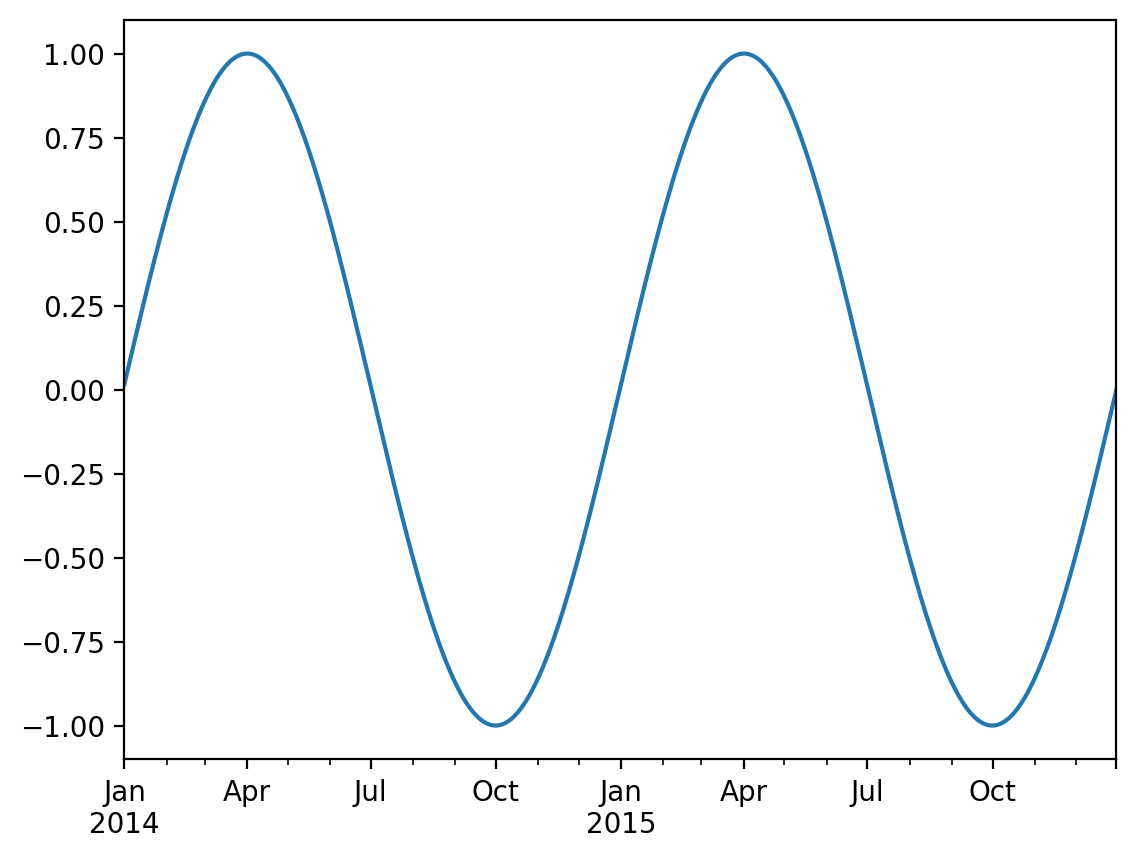

In [61]:
timeseries.plot()

In [62]:
timeseries

2014-01-01    1.721336e-02
2014-01-02    3.442161e-02
2014-01-03    5.161967e-02
2014-01-04    6.880243e-02
2014-01-05    8.596480e-02
                  ...     
2015-12-27   -6.880243e-02
2015-12-28   -5.161967e-02
2015-12-29   -3.442161e-02
2015-12-30   -1.721336e-02
2015-12-31    6.432491e-16
Freq: D, Length: 730, dtype: float64

<AxesSubplot: >

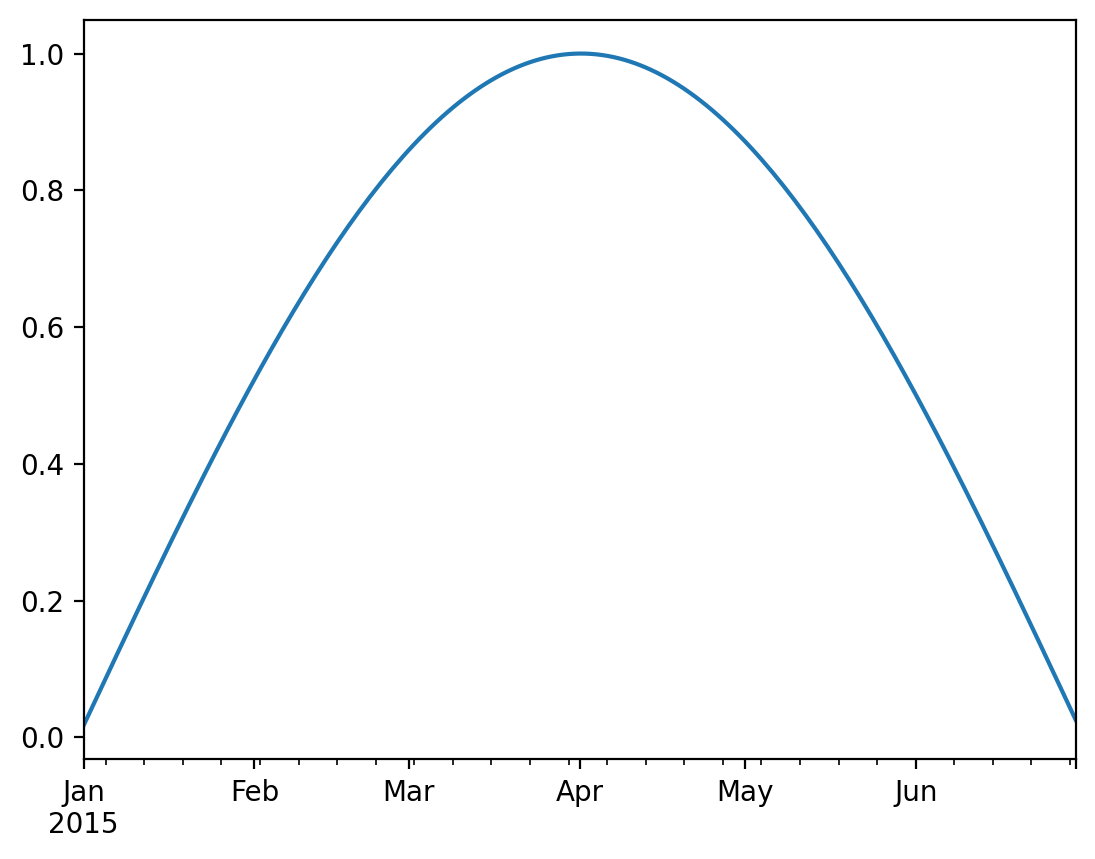

In [63]:
timeseries.loc['2015-01-01':'2015-06-30'].plot()

In [64]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', length=730)

## Reading Data Files

In [74]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

'/home/jovyan/.cache/noaa-data/data.txt'

In [75]:
! head '/home/jovyan/.cache/noaa-data/data.txt'

WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY 
64756 20170101  2.422  -73.74   41.79     6.6    -5.4     0.6     2.2     0.0     8.68 C     7.9    -6.6    -0.5    84.8    30.7    53.7 -99.000 -99.000   0.207   0.152   0.175    -0.1     0.0     0.6     1.5     3.4
64756 20170102  2.422  -73.74   41.79     4.0    -6.8    -1.4    -1.2     0.0     2.08 C     4.1    -7.1    -1.6    91.1    49.1    77.4 -99.000 -99.000   0.205   0.151   0.173    -0.2     0.0     0.6     1.5     3.3
64756 20170103  2.422  -73.74   41.79     4.9     0.7     2.8     2.7    13.1     0.68 C     3.9     0.1     1.6    96.5 

In [76]:
! ls -lat

total 2160
drwxr-xr-x 3 jovyan jovyan    4096 Oct  6 14:18 .
-rw-r--r-- 1 jovyan jovyan  355561 Oct  6 14:18 pandas_fundamentals.ipynb
-rw-r--r-- 1 jovyan jovyan   33292 Oct  4 14:22 objects_and_references.ipynb
drwxr-xr-x 2 jovyan jovyan    4096 Oct  4 13:17 .ipynb_checkpoints
-rw-r--r-- 1 jovyan jovyan 1465707 Sep 29 14:54 more_matplotlib.ipynb
-rw-r--r-- 1 jovyan jovyan   72001 Sep 29 13:55 Untitled1.ipynb
-rw-r--r-- 1 jovyan jovyan  201232 Sep 27 11:42 numpy_and_matplotlib.ipynb
-rw-r--r-- 1 jovyan jovyan   12470 Sep 22 14:26 Untitled.ipynb
drwxr-xr-x 8 jovyan jovyan    4096 Sep 21 14:10 ..
-rw-r--r-- 1 jovyan jovyan   11649 Sep 15 14:54 python_functions_and_classes.ipynb
-rw-r--r-- 1 jovyan jovyan   28752 Sep 15 14:54 python_fundamentals.ipynb


In [77]:
df = pd.read_csv(datafile)

In [78]:
df

,WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY
0,64756 20170101 2.422 -73.74 41.79 6.6 ...
1,64756 20170102 2.422 -73.74 41.79 4.0 ...
2,64756 20170103 2.422 -73.74 41.79 4.9 ...
3,64756 20170104 2.422 -73.74 41.79 8.7 ...
4,64756 20170105 2.422 -73.74 41.79 -0.5 ...
...,...
360,64756 20171227 2.622 -73.74 41.79 -6.7 ...
361,64756 20171228 2.622 -73.74 41.79 -10.3 ...
362,64756 20171229 2.622 -73.74 41.79 -9.4 ...
363,64756 20171230 2.622 -73.74 41.79 -7.1 ...


In [79]:
df = pd.read_csv(datafile, sep='\s+')

In [80]:
df

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,-99.000,-99.000,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,-99.000,-99.000,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,-99.000,-99.000,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,-99.000,-99.000,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,-99.000,-99.000,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,64756,20171227,2.622,-73.74,41.79,-6.7,-19.3,-13.0,-12.9,0.0,...,0.258,0.238,0.215,0.166,0.170,0.8,1.0,1.7,3.1,4.6
361,64756,20171228,2.622,-73.74,41.79,-10.3,-21.5,-15.9,-15.8,0.0,...,0.235,0.244,0.211,0.165,0.168,0.4,0.6,1.4,2.8,4.5
362,64756,20171229,2.622,-73.74,41.79,-9.4,-19.0,-14.2,-14.7,0.0,...,-99.000,-99.000,0.207,0.163,0.167,0.1,0.4,1.1,2.6,4.3
363,64756,20171230,2.622,-73.74,41.79,-7.1,-18.9,-13.0,-13.6,1.1,...,-99.000,-99.000,0.203,0.161,0.166,0.0,0.2,0.9,2.4,4.1


In [82]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])

In [83]:
df

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,64756,20171227,2.622,-73.74,41.79,-6.7,-19.3,-13.0,-12.9,0.0,...,0.258,0.238,0.215,0.166,0.170,0.8,1.0,1.7,3.1,4.6
361,64756,20171228,2.622,-73.74,41.79,-10.3,-21.5,-15.9,-15.8,0.0,...,0.235,0.244,0.211,0.165,0.168,0.4,0.6,1.4,2.8,4.5
362,64756,20171229,2.622,-73.74,41.79,-9.4,-19.0,-14.2,-14.7,0.0,...,NaN,NaN,0.207,0.163,0.167,0.1,0.4,1.1,2.6,4.3
363,64756,20171230,2.622,-73.74,41.79,-7.1,-18.9,-13.0,-13.6,1.1,...,NaN,NaN,0.203,0.161,0.166,0.0,0.2,0.9,2.4,4.1


In [87]:
type(df.SUR_TEMP_DAILY_TYPE[0])

str

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WBANNO                   365 non-null    int64  
 1   LST_DATE                 365 non-null    int64  
 2   CRX_VN                   365 non-null    float64
 3   LONGITUDE                365 non-null    float64
 4   LATITUDE                 365 non-null    float64
 5   T_DAILY_MAX              364 non-null    float64
 6   T_DAILY_MIN              364 non-null    float64
 7   T_DAILY_MEAN             364 non-null    float64
 8   T_DAILY_AVG              364 non-null    float64
 9   P_DAILY_CALC             364 non-null    float64
 10  SOLARAD_DAILY            364 non-null    float64
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object 
 12  SUR_TEMP_DAILY_MAX       364 non-null    float64
 13  SUR_TEMP_DAILY_MIN       364 non-null    float64
 14  SUR_TEMP_DAILY_AVG       3

In [89]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.00, -99.0], parse_dates=[1])

In [94]:
type(df.LST_DATE[0])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
df = df.set_index('LST_DATE')

In [96]:
df

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,64756,2.622,-73.74,41.79,-6.7,-19.3,-13.0,-12.9,0.0,8.36,...,0.258,0.238,0.215,0.166,0.170,0.8,1.0,1.7,3.1,4.6
2017-12-28,64756,2.622,-73.74,41.79,-10.3,-21.5,-15.9,-15.8,0.0,8.46,...,0.235,0.244,0.211,0.165,0.168,0.4,0.6,1.4,2.8,4.5
2017-12-29,64756,2.622,-73.74,41.79,-9.4,-19.0,-14.2,-14.7,0.0,7.09,...,NaN,NaN,0.207,0.163,0.167,0.1,0.4,1.1,2.6,4.3


In [98]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

In [99]:
df.loc['2017-07-01':'2017-07-31']

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


In [100]:
df.describe()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,365.0,365.000000,3.650000e+02,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64756.0,2.470767,-7.374000e+01,4.179000e+01,15.720055,4.037912,9.876374,9.990110,2.797802,13.068187,...,0.189498,0.183991,0.165470,0.140192,0.160630,12.312637,12.320604,12.060165,11.978022,11.915659
std,0.0,0.085997,5.265234e-13,3.842198e-13,10.502087,9.460676,9.727451,9.619168,7.238628,7.953074,...,0.052031,0.054113,0.043989,0.020495,0.016011,9.390034,9.338176,8.767752,8.078346,7.187317
min,64756.0,2.422000,-7.374000e+01,4.179000e+01,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,...,0.075000,0.078000,0.087000,0.101000,0.117000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,64756.0,2.422000,-7.374000e+01,4.179000e+01,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,...,0.152000,0.139000,0.118750,0.118000,0.154000,2.225000,2.000000,2.475000,3.300000,4.100000
50%,64756.0,2.422000,-7.374000e+01,4.179000e+01,17.450000,4.350000,10.850000,11.050000,0.000000,12.865000,...,0.192000,0.198000,0.183000,0.147500,0.165000,13.300000,13.350000,13.100000,12.850000,11.600000
75%,64756.0,2.422000,-7.374000e+01,4.179000e+01,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,...,0.234000,0.227000,0.203000,0.157000,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,64756.0,2.622000,-7.374000e+01,4.179000e+01,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,...,0.296000,0.321000,0.235000,0.182000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


In [103]:
df.boxplot?

Signature:
df.boxplot(
    column=None,
    by=None,
    ax=None,
    fontsize=None,
    rot: 'int' = 0,
    grid: 'bool' = True,
    figsize=None,
    layout=None,
    return_type=None,
    backend=None,
    **kwargs,
)
Docstring:
Make a box plot from DataFrame columns.

Make a box-and-whisker plot from DataFrame columns, optionally grouped
by some other columns. A box plot is a method for graphically depicting
groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). The whiskers extend from the edges
of box to show the range of the data. By default, they extend no more than
`1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
data point within that interval. Outliers are plotted as separate dots.

For further details see
Wikipedia's entry for `boxplot <https://en.wikipedia.org/wiki/Box_plot>`_.

Parameters
----------
column : str or list of str, optional
    Column name or

<AxesSubplot: >

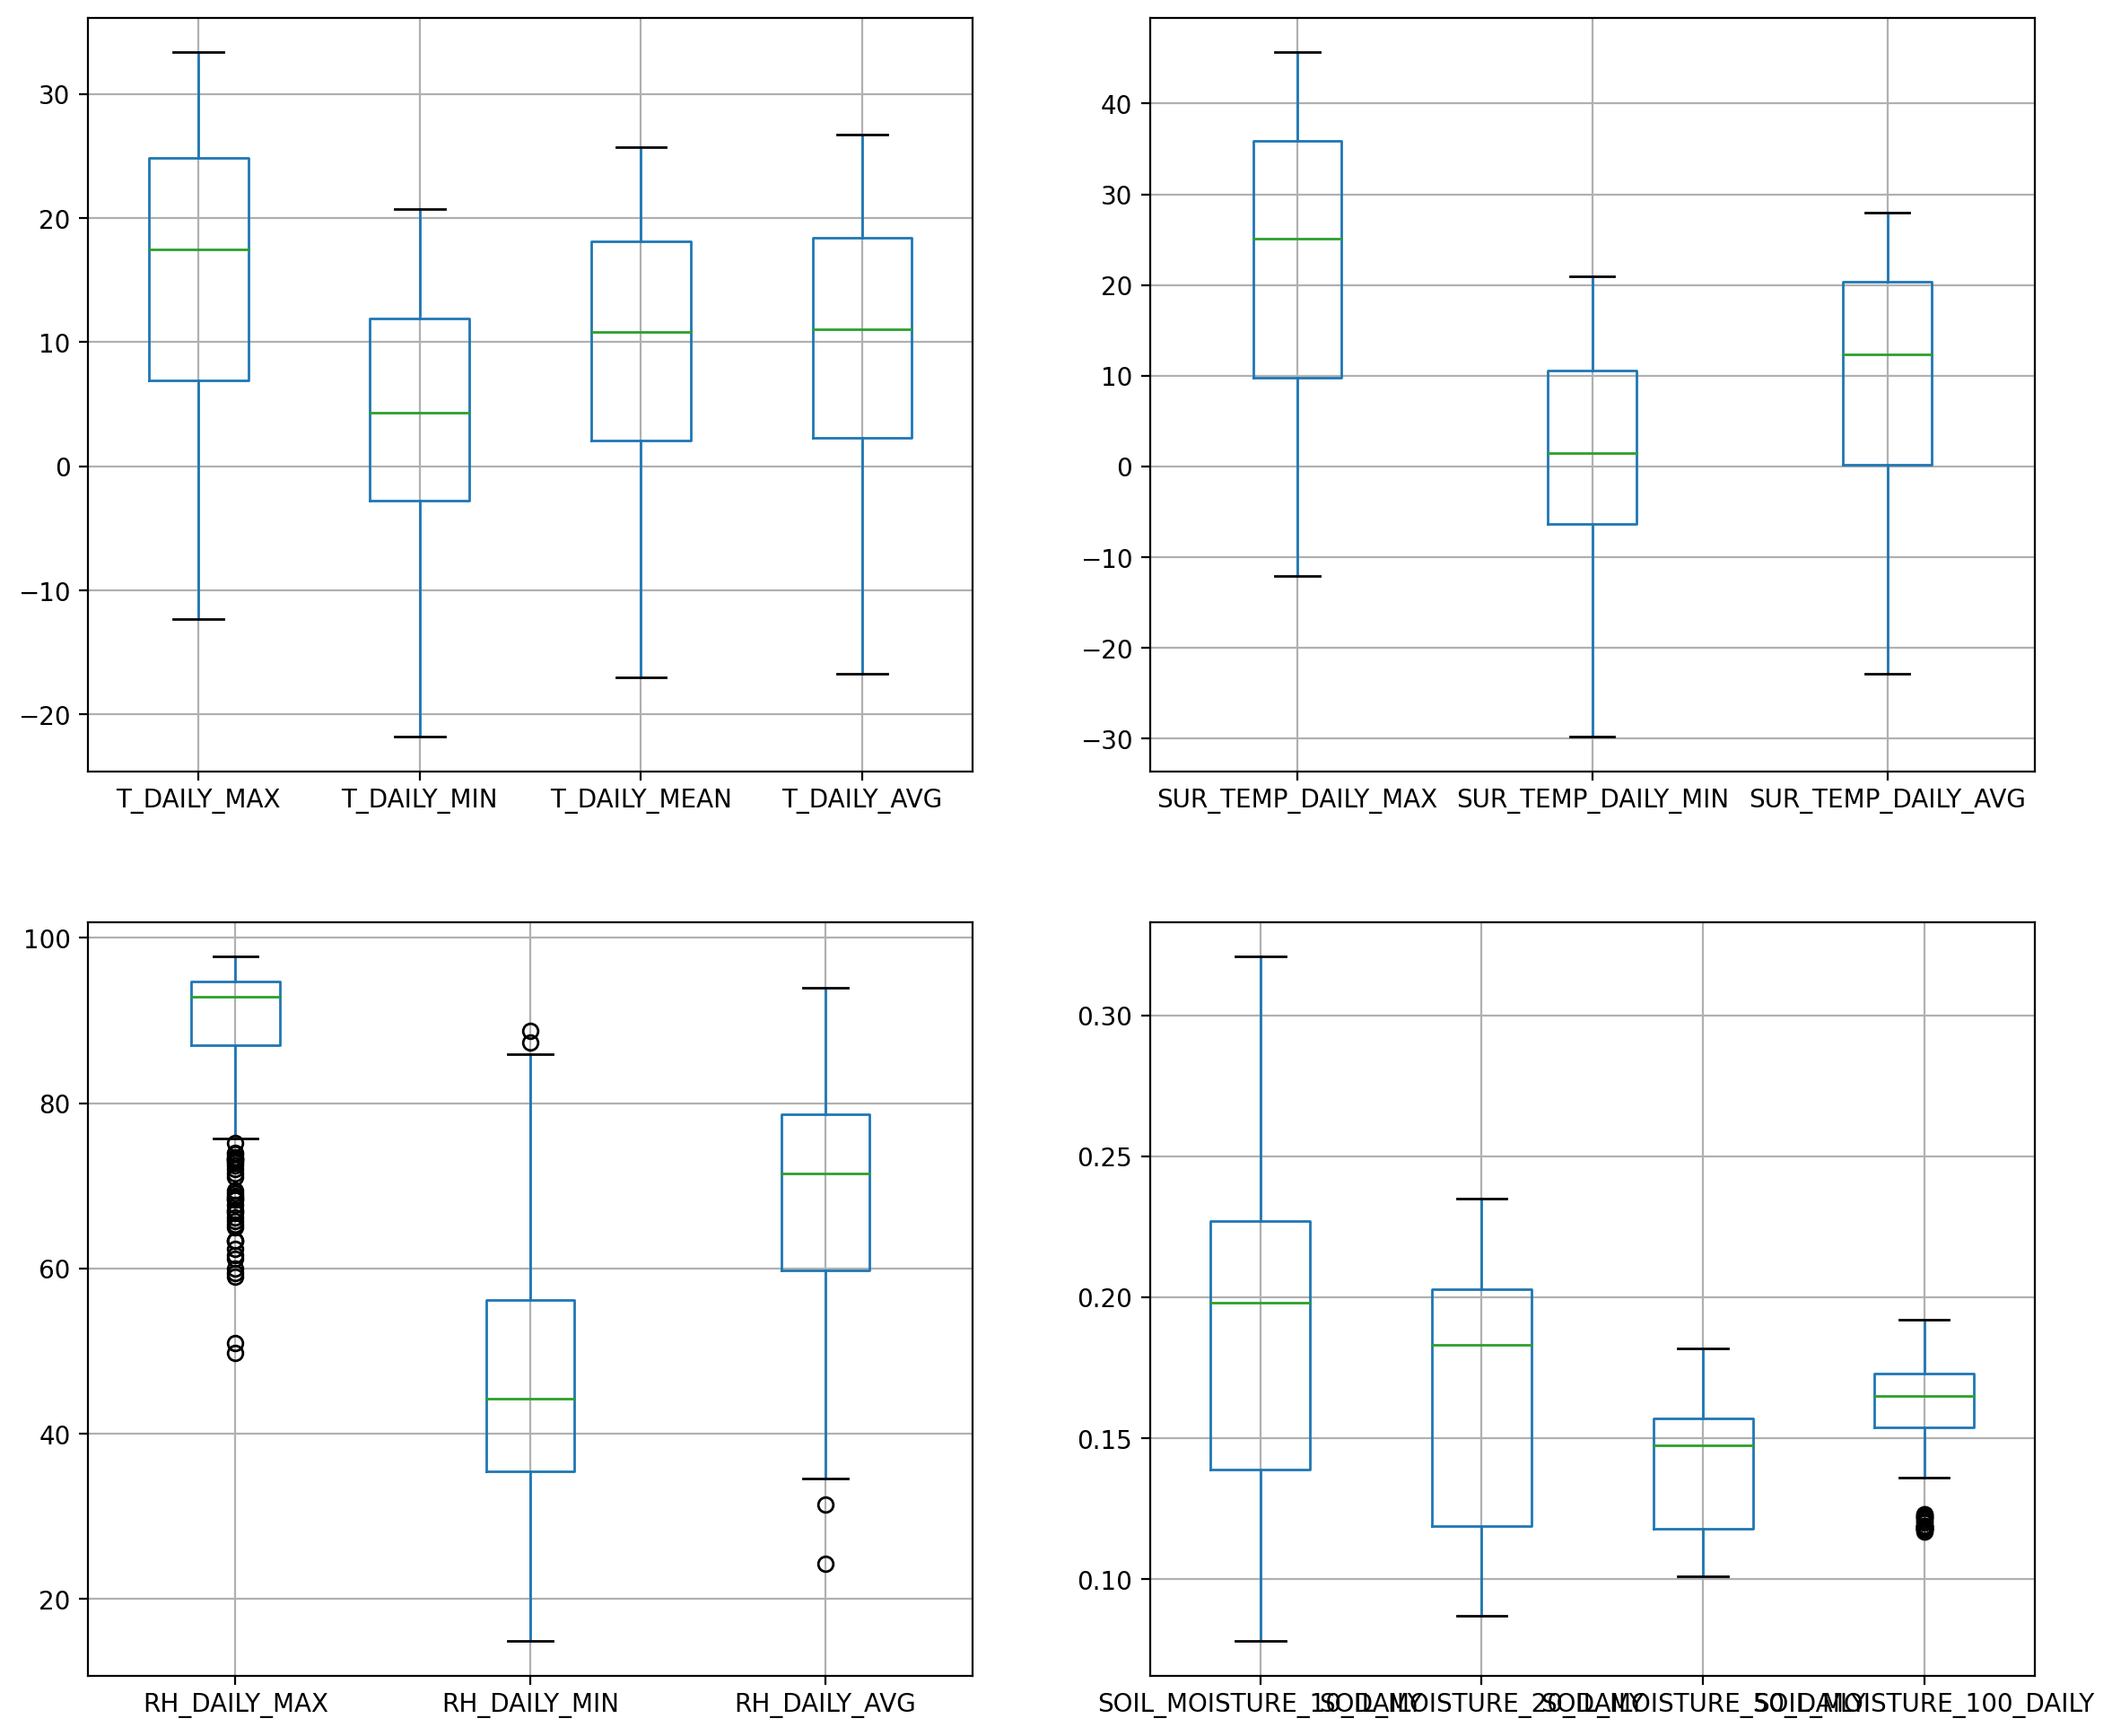

In [106]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
df.iloc[:, 4:8].boxplot(ax=ax[0, 0])
df.iloc[:, 10:14].boxplot(ax=ax[0, 1])
df.iloc[:, 14:17].boxplot(ax=ax[1, 0])
df.iloc[:, 18:22].boxplot(ax=ax[1, 1])

Text(0.5, 1.0, 'Pandas Yay!')

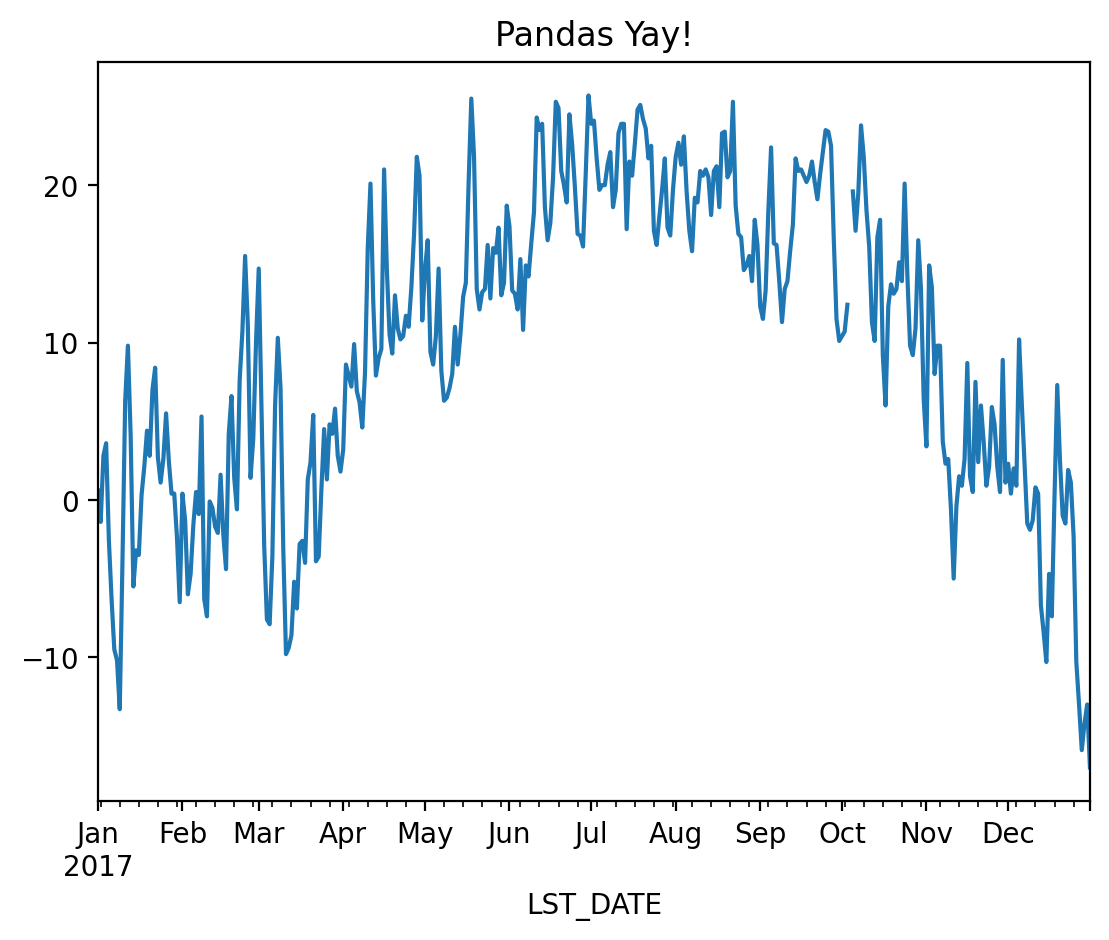

In [110]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Yay!')

<AxesSubplot: xlabel='LST_DATE'>

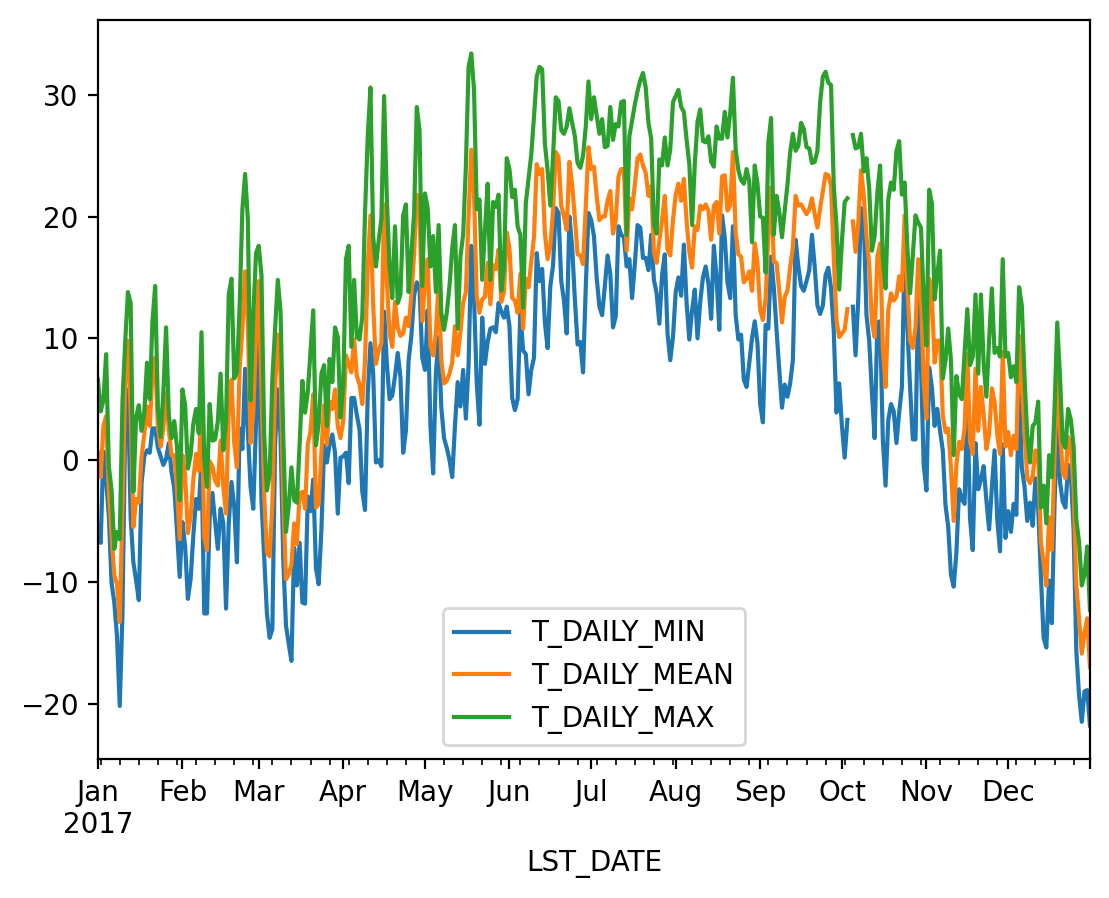

In [111]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

In [121]:
rs_obj = df.resample('MS')

In [127]:
rs_obj.mean?

Signature:
rs_obj.mean(
    numeric_only: 'bool | lib.NoDefault' = <no_default>,
    *args,
    **kwargs,
)
Docstring:
Compute mean of groups, excluding missing values.

Parameters
----------
numeric_only : bool, default True
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data.

engine : str, default None
    * ``'cython'`` : Runs the operation through C-extensions from cython.
    * ``'numba'`` : Runs the operation through JIT compiled code from numba.
    * ``None`` : Defaults to ``'cython'`` or globally setting
      ``compute.use_numba``

    .. versionadded:: 1.4.0

engine_kwargs : dict, default None
    * For ``'cython'`` engine, there are no accepted ``engine_kwargs``
    * For ``'numba'`` engine, the engine can accept ``nopython``, ``nogil``
      and ``parallel`` dictionary keys. The values must either be ``True`` or
      ``False``. The default ``engine_kwargs`` for the ``'numba'`` engine is
      ``{{'nopython

In [122]:
type(rs_obj)

pandas.core.resample.DatetimeIndexResampler

In [123]:
rs_obj.mean(numeric_only=True)

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756.0,2.422000,-73.74,41.79,3.945161,-3.993548,-0.025806,0.038710,3.090323,4.690000,...,0.236900,0.248300,0.204550,0.152806,0.175194,0.209677,0.267742,0.696774,1.438710,2.877419
2017-02-01,64756.0,2.422000,-73.74,41.79,7.246429,-4.360714,1.442857,1.839286,2.414286,10.364286,...,0.226333,0.243000,0.207545,0.152857,0.175786,1.125000,1.100000,1.192857,1.492857,2.367857
2017-03-01,64756.0,2.422000,-73.74,41.79,5.164516,-5.335484,-0.090323,0.167742,3.970968,13.113548,...,0.218033,0.229267,0.196258,0.153484,0.174548,2.122581,2.161290,2.345161,2.700000,3.387097
2017-04-01,64756.0,2.422000,-73.74,41.79,17.813333,5.170000,11.493333,11.540000,2.300000,14.645000,...,0.199733,0.210300,0.190667,0.151000,0.172400,11.066667,10.666667,9.636667,8.426667,6.903333
2017-05-01,64756.0,2.422000,-73.74,41.79,19.151613,7.338710,13.229032,13.638710,4.141935,16.519677,...,0.206613,0.210935,0.185613,0.147710,0.170000,16.454839,16.290323,15.361290,14.270968,12.696774
2017-06-01,64756.0,2.422000,-73.74,41.79,25.423333,12.176667,18.796667,18.986667,3.743333,21.655000,...,0.185167,0.184300,0.173167,0.142533,0.167000,22.350000,22.166667,20.880000,19.370000,17.333333
2017-07-01,64756.0,2.422000,-73.74,41.79,26.912903,15.183871,21.048387,20.993548,2.732258,20.566129,...,0.131226,0.115774,0.116613,0.121032,0.156677,24.993548,24.980645,23.925806,22.745161,21.164516
2017-08-01,64756.0,2.422000,-73.74,41.79,25.741935,12.954839,19.351613,19.477419,2.758065,18.360000,...,0.143871,0.122258,0.105452,0.115290,0.151034,23.374194,23.519355,22.848387,22.193548,21.377419
2017-09-01,64756.0,2.422000,-73.74,41.79,24.186667,11.300000,17.746667,17.463333,1.893333,15.154667,...,0.145167,0.139633,0.117267,0.112167,0.141926,20.256667,20.386667,19.966667,19.766667,19.530000


<AxesSubplot: xlabel='LST_DATE'>

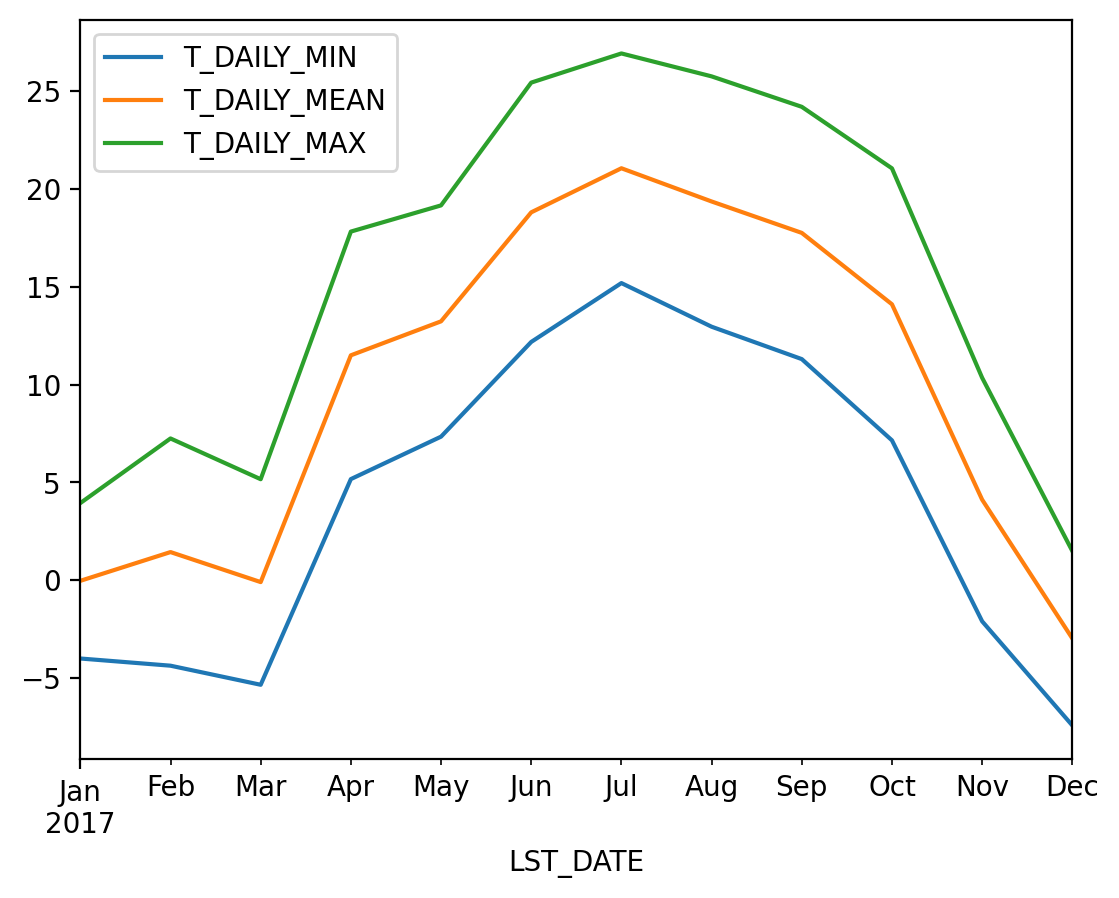

In [125]:
df_mm = df.resample('MS').mean(numeric_only=True)
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

<AxesSubplot: xlabel='LST_DATE'>

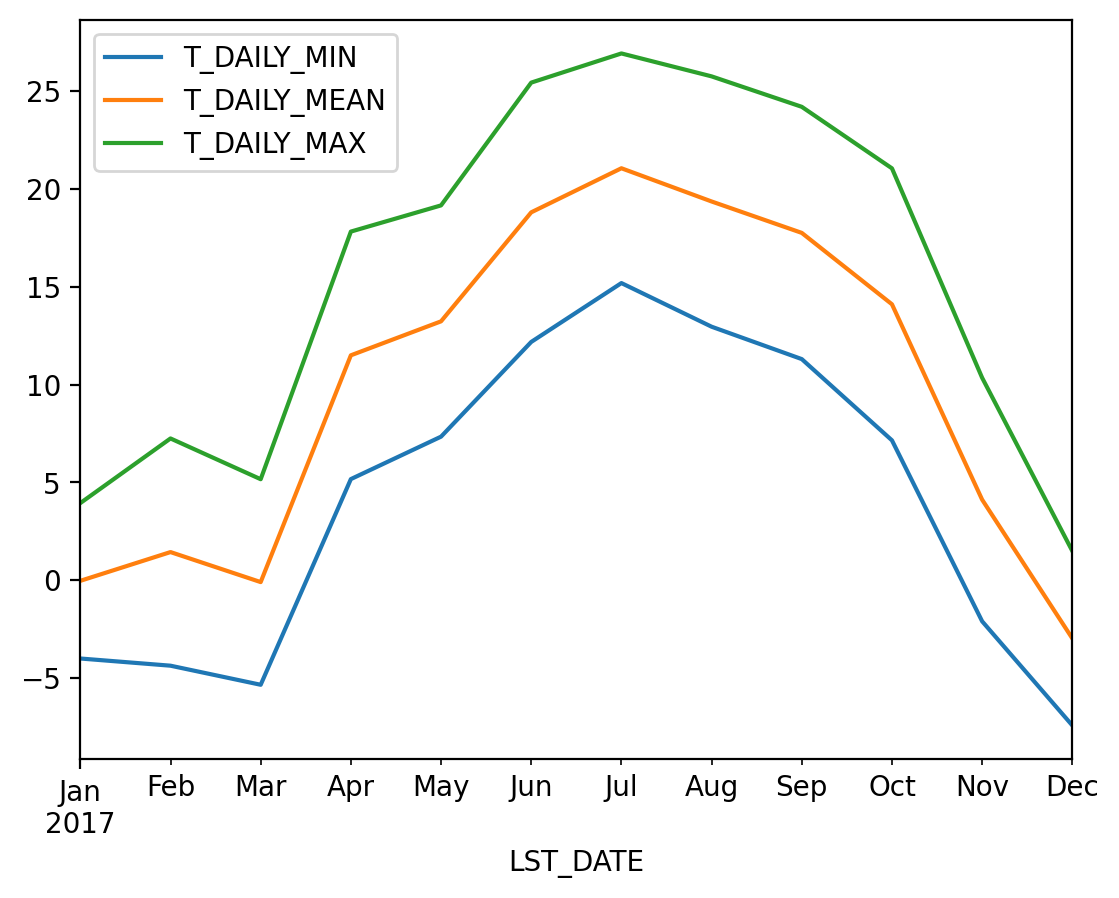

In [125]:
df_mm = df.resample('MS').mean(numeric_onl
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()